In [1]:
# Import Library
import pandas as pd
import numpy as np


from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

from keras.preprocessing.text import text_to_word_sequence

import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

plt.style.use("seaborn")

import warnings
warnings.filterwarnings("ignore")

In [2]:
# data load
data = pd.read_csv('/kaggle/input/fifa-world-cup-2022-tweets/fifa_world_cup_2022_tweets.csv')

In [3]:
data

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
...,...,...,...,...,...,...
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive


In [4]:
data = data.iloc[:,4:]

In [5]:
df = data.copy()
df

,Tweet,Sentiment
0,What are we drinking today @TucanTribe \n@MadB...,neutral
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,Worth reading while watching #WorldCup2022 htt...,positive
3,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,"If the BBC cares so much about human rights, h...",negative
...,...,...
22519,Here We go World cup 2022 #WorldCup2022,positive
22520,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,Great thread to read before the start of #Worl...,positive
22522,Raphinha wants Brazil to be united at the #Wor...,positive


In [7]:
df['Tweet']

0        What are we drinking today @TucanTribe \n@MadB...
1        Amazing @CanadaSoccerEN  #WorldCup2022 launch ...
2        Worth reading while watching #WorldCup2022 htt...
3        Golden Maknae shinning bright\n\nhttps://t.co/...
4        If the BBC cares so much about human rights, h...
                               ...                        
22519              Here We go World cup 2022 #WorldCup2022
22520    Anderlecht confirms former Viborg FF's Jesper ...
22521    Great thread to read before the start of #Worl...
22522    Raphinha wants Brazil to be united at the #Wor...
22523    How to buy $SOT on PinkSale?🤔\n\nHave you been...
Name: Tweet, Length: 22524, dtype: object

In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
# word tokenize from data["Tweet"] and stored in list called doc_token
doc_token = []

for sentence in list(data["Tweet"]):
    doc_token.append(text_to_word_sequence(sentence))

In [ ]:
doc_token

In [10]:
# Load manually stop words collection
with open("/kaggle/input/stopwords-1/stop.txt") as stop:
    stop_words = stop.read()

stop_words = stop_words.split("\n")
stop_words.extend(["http", "https", "world cup", "worldcup", "fifa", "fifaworldcup", "fifa worldcup", "fifa world cup", "world", "cup", "game", "open", "today", "football"])


In [12]:
import nltk

In [13]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

WordNetLemmatizer: In contrast to stemming, lemmatization is a lot more powerful. It looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words, aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

In [14]:
doc_ = []

for sentence in doc_token:
    doc_.append([SnowballStemmer(language="english").stem(WordNetLemmatizer().lemmatize(word)) for word in sentence if word not in stop_words])

In [16]:
# Split the where find "\n" words
aa = str(doc_)
aa = re.sub(r"([^A-Za-z]|_)+", " ",aa).split("\n")

In [19]:
# stored word which is not in Stop Words and len of words is gearater then 3. Genrally len word = 3 is Stopwords
aa = " ".join(i for i in word_tokenize(str(aa)) if i not in stop_words)
aa = " ".join(i for i in word_tokenize(str(aa)) if len(i) > 3)

In [20]:
# Count frequency of word in document
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
corpus = [aa]

In [23]:
bow = CountVectorizer()

In [28]:
# Transform bow into matrix
print(bow.fit_transform(corpus).todense())

[[3 2 1 ... 1 1 1]]


In [24]:
# Store only those words which is in dictinoary
bag_of_words_df = pd.DataFrame(bow.fit_transform(corpus).todense())

In [25]:
bag_of_words_df.columns = sorted(bow.vocabulary_)

In [26]:
bag_of_words_df

,aaaa,aaaaaaa,aaaaaaaa,aaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaand,aaaaaand,aaaaaanyon,aaaaah,aaaakkkkkk,aaaand,...,zzgr,zzhfkq,zzoidgp,zzto,zzuluwpb,zzxtgqf,zzztp,zzzx,zzzzzzz,zzzzzzzzz
0,3,2,1,1,1,3,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [27]:
# Bag of word model for top 5 frequent terms
bag_of_words_model = CountVectorizer(max_features = 20)

bag_of_words_df = pd.DataFrame(bag_of_words_model.fit_transform(corpus).todense())
bag_of_words_df.columns = sorted(bag_of_words_model.vocabulary_)
bag_of_words_df

,ceremoni,corrupt,ecuador,england,goal,good,host,live,match,offsid,play,player,qatar,qatarworldcup,qatecu,start,team,time,watch,worldcupqatar
0,1484,656,2497,794,1623,687,740,1077,1185,1160,787,738,9127,2248,672,1282,1457,958,1294,997


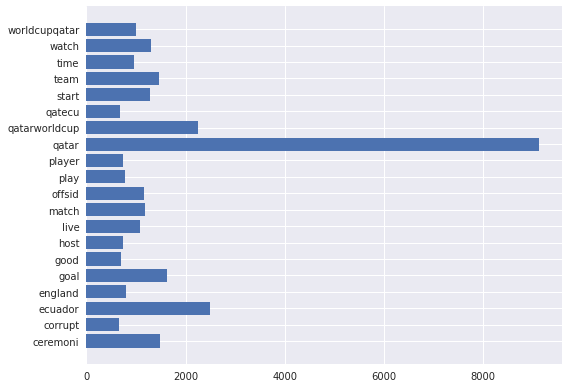

In [28]:
# Visualize top 20 words and their Count
plt.barh(width = bag_of_words_df.values.tolist()[0], y = bag_of_words_df.T.index.tolist())
plt.tight_layout()
plt.show()

In [29]:
# transform bow into Term document inverse matrix
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

model = TfidfVectorizer(max_features=20)

print(model.fit_transform(corpus).todense())

[[0.13875505 0.06133646 0.23347126 0.07423956 0.15175165 0.06423499
  0.06919052 0.10070026 0.11079834 0.10846082 0.07358506 0.06900352
  0.85338094 0.21018959 0.06283247 0.11986791 0.13623053 0.08957368
  0.12098991 0.0932202 ]]


In [30]:
model_df = pd.DataFrame(model.fit_transform(corpus).todense())
model_df.columns = sorted(model.vocabulary_)
model_df

,ceremoni,corrupt,ecuador,england,goal,good,host,live,match,offsid,play,player,qatar,qatarworldcup,qatecu,start,team,time,watch,worldcupqatar
0,0.138755,0.061336,0.233471,0.07424,0.151752,0.064235,0.069191,0.1007,0.110798,0.108461,0.073585,0.069004,0.853381,0.21019,0.062832,0.119868,0.136231,0.089574,0.12099,0.09322


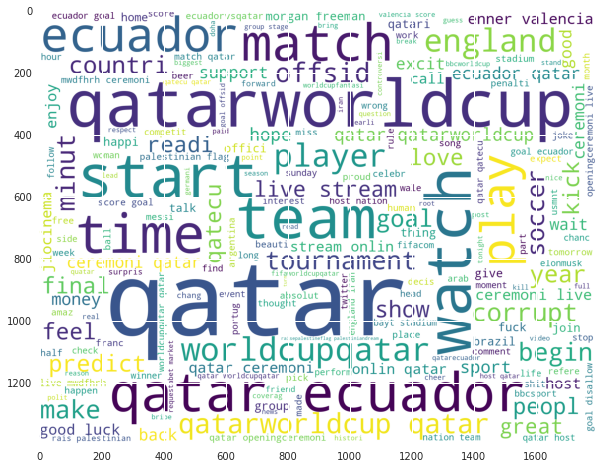

In [31]:
# generate wordCloud to visulaize which word is trend maximum time in corpus
plt.figure(figsize = (10,10))

wordcloud_ip = WordCloud(background_color = "white", width = 1800, height = 1400).generate(aa)

plt.imshow(wordcloud_ip)
plt.show()

In [ ]:
# # 1) Custom defined function to make bi-gram

# import re

# def n_gram_extractor(input_str, n):
#     token = re.sub(r"([^\s\w]|_)+", " ", input_str).split()
#     for i in range(len(token)-n+1):
#         print(token[i:i+n])

# n_gram_extractor(aa, 2)

# Model Building

In [33]:
data

,Tweet,Sentiment
0,What are we drinking today @TucanTribe \n@MadB...,neutral
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,Worth reading while watching #WorldCup2022 htt...,positive
3,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,"If the BBC cares so much about human rights, h...",negative
...,...,...
22519,Here We go World cup 2022 #WorldCup2022,positive
22520,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,Great thread to read before the start of #Worl...,positive
22522,Raphinha wants Brazil to be united at the #Wor...,positive


In [34]:
# clean the data before proceding in Model 
def data_cleaning(i):
    i = re.sub(r"([^A-Za-z]|_)+", " ", i).lower()
    w = []
    for word in i.split(","):
        if len(word) > 3:
            w.append(word)
    return (" ".join(w))

data["Tweet"] = data["Tweet"].apply(data_cleaning)
data["Tweet"]

0        what are we drinking today tucantribe madbears...
1        amazing canadasocceren worldcup launch video s...
2        worth reading while watching worldcup https t ...
3        golden maknae shinning bright https t co ayzbz...
4        if the bbc cares so much about human rights ho...
                               ...                        
22519                       here we go world cup worldcup 
22520    anderlecht confirms former viborg ff s jesper ...
22521    great thread to read before the start of world...
22522    raphinha wants brazil to be united at the worl...
22523    how to buy sot on pinksale have you been confu...
Name: Tweet, Length: 22524, dtype: object

In [35]:
data["Sentiment"].value_counts()

positive    8489
neutral     8251
negative    5784
Name: Sentiment, dtype: int64

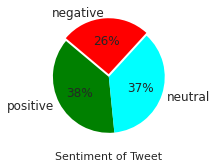

In [36]:
# show frequency of output in %
plt.figure(figsize = (3,3))
labels = ["positive", "neutral", "negative"]
sizes = [8489, 8251, 5784]
color = ["green", "cyan", "red"]

plt.pie(sizes, 
        labels = labels, 
        textprops={'fontsize': 12}, 
        startangle=140, 
        autopct='%1.0f%%',
        explode=[0, 0, 0.05],
        colors = color)
plt.xlabel("Sentiment of Tweet")

plt.tight_layout()
plt.show()

In [37]:
# divide data into train and test for further work
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=123, stratify = data["Sentiment"])

display(train)
display(test)

,Tweet,Sentiment
17113,bts s jungkook and the lowdown on him playing ...,neutral
13719,this could end up being amongst the best world...,positive
1927,notorious mufcwonitall unitedstime and the li...,negative
11085,if the rumors of ecuadorian players taking bri...,neutral
13417,i ve been holding onto this vuvuzela foreeev e...,positive
...,...,...
7112,goal of ecuador cancelled by var for offside t...,negative
7081,it s workd cup time worldcup fifaworldcup http...,positive
1110,fifaworldcup bts bighit dancing on the grave ...,negative
12069,the men who defend their religion are the same...,negative


,Tweet,Sentiment
15359,staying home with a fever means i can watch th...,neutral
14079,do we see btc bitcoin going to k the next mont...,neutral
8061,worldcup is already corrupted with var giving...,negative
17435,worldcup fifaworldcupqatar kicks off today at...,positive
4210,wait did qatar actually think they stood a cha...,neutral
...,...,...
21616,worldcup excited for tomorrow usmnt time to s...,positive
1502,am the trophy you should be watching not world...,neutral
14083,x times it has been changed but now it is off...,neutral
1393,meta cp okay so your bear is absolutely fire ...,positive


In [38]:
# Count frequency of word 
def split_into_words(i):
    return [word for word in i.split(" ")]

data_bow = CountVectorizer(analyzer = split_into_words).fit(data["Tweet"])
data_bow

CountVectorizer(analyzer=<function split_into_words at 0x7eaff7fff290>)

In [39]:
# transform bow through Count Vectorizer
all_data_matrix = data_bow.transform(data["Tweet"])
all_data_matrix.shape

(22524, 36362)

In [40]:
# trnsform bow into matrix for further evaluation
train_matrix = data_bow.transform(train["Tweet"])
test_matrix = data_bow.transform(test["Tweet"])

display(train_matrix.shape)
display(test_matrix.shape)

(18019, 36362)

(4505, 36362)

In [41]:
tfid_matrix = TfidfTransformer().fit(all_data_matrix)
tfid_matrix

TfidfTransformer()

In [42]:
train_matrix_2 = tfid_matrix.transform(train_matrix)
test_matrix_2 = tfid_matrix.transform(test_matrix)

display(train_matrix_2.shape)
display(test_matrix_2.shape)

(18019, 36362)

(4505, 36362)

In [53]:
from xgboost import XGBClassifier

In [43]:
# Model list
naive_Mul = MultinomialNB()
naive_Ber = BernoulliNB()


model_list = [naive_Mul, naive_Ber]
model_list

[MultinomialNB(), BernoulliNB()]

In [44]:
def model_pipline(model):
    model.fit(train_matrix_2, train["Sentiment"])

    print(".......................................................................")
    print()
    

    print("{}".format(model))

    print("For Test:")
    test_pred = model.predict(test_matrix_2)
    display(pd.crosstab(test["Sentiment"], test_pred, rownames = ["Actual"], colnames = ["Prediction"]))
    print("Accuracy: ", accuracy_score(test["Sentiment"], test_pred))
    
    print("---------------")

    print("For Train:")
    train_pred = model.predict(train_matrix_2)
    display(pd.crosstab(train["Sentiment"], train_pred, rownames = ["Actual"], colnames = ["Prediction"]))
    print("Accuracy: ", accuracy_score(train["Sentiment"], train_pred))

In [59]:
for model in model_list:
    model_pipline(model)

.......................................................................

MultinomialNB()
For Test:


Prediction,negative,neutral,positive
Actual,,,
negative,738,245,174
neutral,156,1081,413
positive,53,283,1362


Accuracy:  0.7061043285238624
---------------
For Train:


Prediction,negative,neutral,positive
Actual,,,
negative,3619,599,409
neutral,408,5468,725
positive,163,452,6176


Accuracy:  0.8470503357567013
.......................................................................

BernoulliNB()
For Test:


Prediction,negative,neutral,positive
Actual,,,
negative,870,188,99
neutral,258,1072,320
positive,140,336,1222


Accuracy:  0.702330743618202
---------------
For Train:


Prediction,negative,neutral,positive
Actual,,,
negative,3807,589,231
neutral,856,5230,515
positive,406,695,5690


Accuracy:  0.8173039569343471
